# Importing Libraries and Renaming Columns

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 

# Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'/Users/crystalosuna/Documents/Gun Violence Analysis'

In [6]:
#Import gun violence data

df= pd.read_csv (os.path.join(path, 'Data', 'gun-violence-data-clean3.csv'), index_col = False)

In [7]:
df.shape

(140226, 26)

In [8]:
df.head()

,Unnamed: 0,0,incident_id,date,state,city_or_county,Killed,Injured,congressional_district,gun_type,...,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,latitude,longitude,year,month,loss
0,2,2,478855,1/1/13,Ohio,Lorain,1,3,9,0::Unknown||1::Unknown,...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56,13,41.4455,-82.1377,2013,1,4
1,4,4,478959,1/7/13,North Carolina,Greensboro,2,2,6,0::Handgun||1::Handgun,...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62,27,36.1140,-79.9569,2013,1,4
2,6,6,479363,1/19/13,New Mexico,Albuquerque,5,0,1,0::22 LR||1::223 Rem [AR-15],...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10,14,34.9791,-106.7160,2013,1,5
3,10,10,491674,1/23/13,Tennessee,Chattanooga,1,3,3,0::Unknown,...,0::Male||1::Male||2::Male||3::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,28,10,35.0221,-85.2697,2013,1,4
4,11,11,479413,1/25/13,Missouri,Saint Louis,1,3,1,0::Unknown,...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,76,4,38.7067,-90.2494,2013,1,4


In [9]:
df.columns

Index(['Unnamed: 0', '0', 'incident_id', 'date', 'state', 'city_or_county',
       'Killed', 'Injured', 'congressional_district', 'gun_type',
       'incident_characteristics', 'Gang Related', 'Mass shooting?',
       'number_guns_involved', 'participant_age', 'participant_age_group',
       'participant_gender', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district', 'latitude',
       'longitude', 'year', 'month', 'loss'],
      dtype='object')

In [10]:
#create a new dataframe with only numerical varibales
df1 = df[['Killed', 'Injured', 'year', 'month', 'loss', 'number_guns_involved']]

In [11]:
df1.head()

,Killed,Injured,year,month,loss,number_guns_involved
0,1,3,2013,1,4,2
1,2,2,2013,1,4,2
2,5,0,2013,1,5,2
3,1,3,2013,1,4,1
4,1,3,2013,1,4,1


# 2. The elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/crystalosuna/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/crystalosuna/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/crystalosuna/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/crystalosuna/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[-5239801.912077927,
 -3328429.702232074,
 -1907292.5732397737,
 -1307062.1113141496,
 -1046580.9781421605,
 -820699.6112176018,
 -734126.4336372653,
 -651619.4342563857,
 -620408.7868768041]

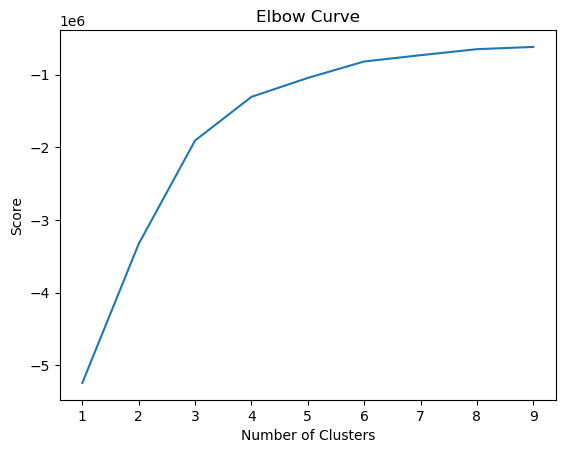

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 3. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters=4) 

I chose 4 clusters because that is the breaking point in where the curve begins to flatten out.

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df1)

/Users/crystalosuna/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [17]:
df1['clusters'] = kmeans.fit_predict(df1)

/Users/crystalosuna/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xd/drqthjd9059gd5kl114ffjhr0000gn/T/ipykernel_15516/865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [18]:
df1.head()

,Killed,Injured,year,month,loss,number_guns_involved,clusters
0,1,3,2013,1,4,2,2
1,2,2,2013,1,4,2,2
2,5,0,2013,1,5,2,2
3,1,3,2013,1,4,1,2
4,1,3,2013,1,4,1,2


In [19]:
df1['clusters'].value_counts()

0    71588
2    68107
3      509
1       22
Name: clusters, dtype: int64

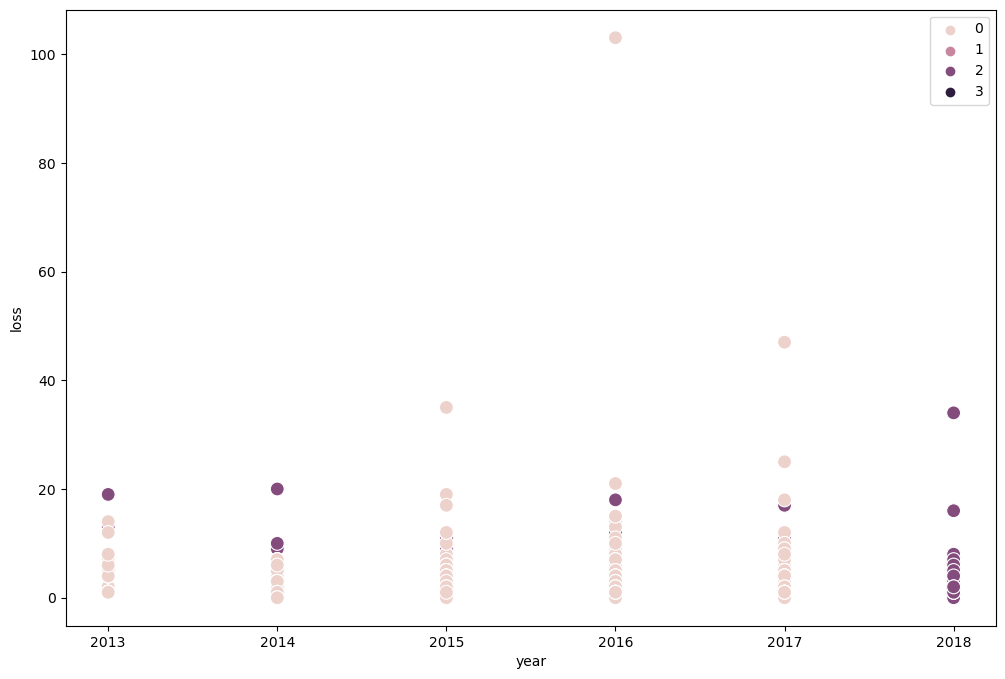

In [20]:
# Plot the clusters for the "year" and "loss" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['year'], y=df['loss'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('year') # Label x-axis.
plt.ylabel('loss') # Label y-axis.
plt.show()

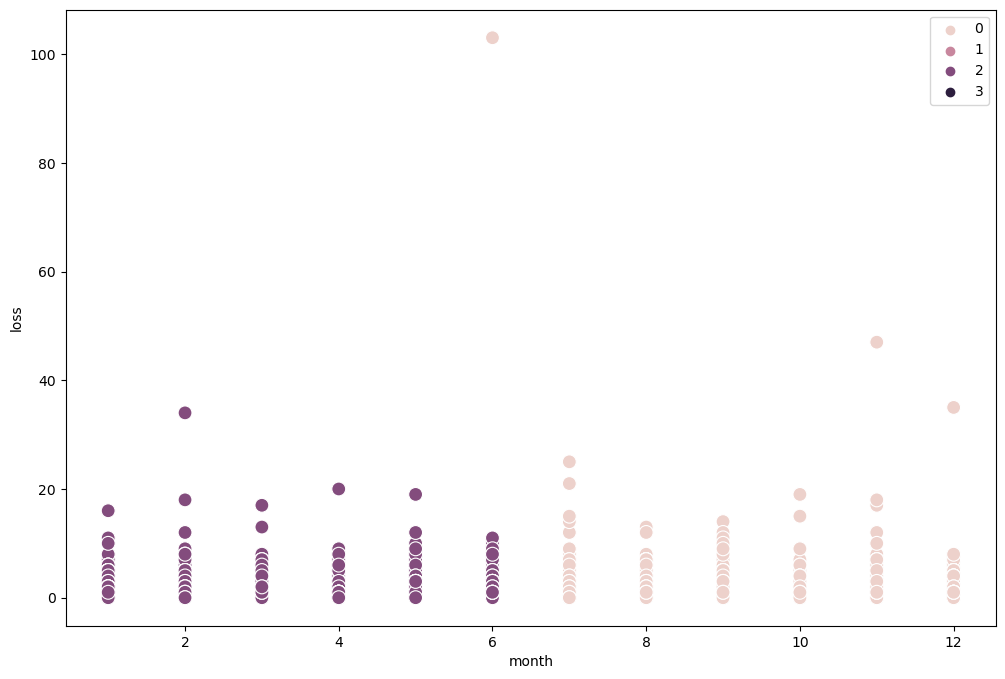

In [21]:
# Plot the clusters for the "month" and "loss" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['month'], y=df['loss'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('month') 
plt.ylabel('loss') 
plt.show()

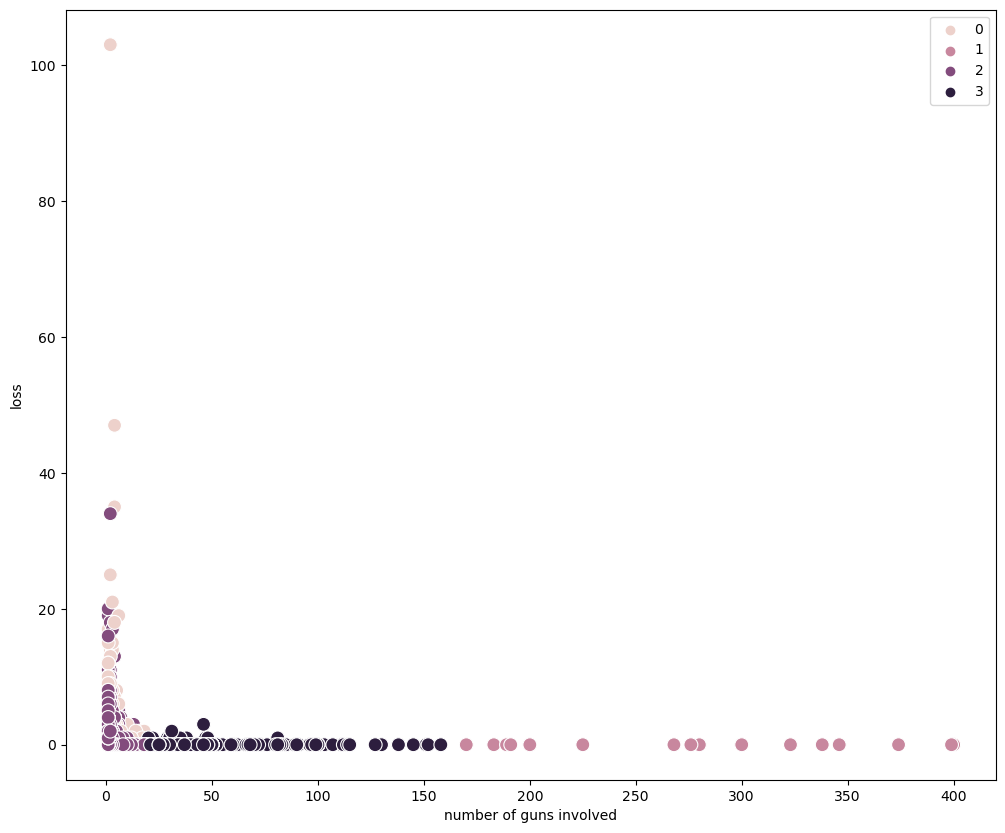

In [22]:
# Plot the clusters for the "number_guns_involved" and "loss" variables.

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=df['number_guns_involved'], y=df['loss'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('number of guns involved') 
plt.ylabel('loss') 
plt.show()

In [23]:
df.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df1['clusters'] == 0, 'cluster'] = 'pink'
df.loc[df1['clusters'] == 3, 'cluster'] = 'dark pink'

The clusters with number of guns involved and number of loss makes sense because most of the gun violence accidents have occured with a low number of guns. The number of losses vs the month cn help us vision which month are the most active when it comes to gun violence They would be starting the month of July through December.

In [24]:
df1.groupby('clusters').agg({'loss':['mean', 'median'], 
                         'year':['mean', 'median'], 
                         'month':['mean', 'median'],
                          'Killed':['mean', 'median'],
                           'Injured':['mean', 'median'],
                           'number_guns_involved':['mean', 'median']})

loss                year             month           Killed  \
              mean median         mean  median      mean median      mean   
clusters                                                                    
0         0.744957    1.0  2016.165740  2016.0  9.596804   10.0  0.260407   
1         0.000000    0.0  2015.272727  2015.0  7.636364    7.0  0.000000   
2         0.669344    1.0  2016.649067  2017.0  3.245202    3.0  0.246612   
3         0.035363    0.0  2016.174853  2016.0  6.223969    6.0  0.023576   

                  Injured        number_guns_involved         
         median      mean median                 mean median  
clusters                                                      
0           0.0  0.484550    0.0             1.185967    1.0  
1           0.0  0.000000    0.0           293.727273  300.0  
2           0.0  0.422732    0.0             1.210859    1.0  
3           0.0  0.011788    0.0            36.583497   30.0

In [27]:
#export
df1.to_csv(os.path.join(path, 'Data', 'gun-violence-data-clusters.csv'))